In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [2]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

In [3]:
dataset_path=keras.utils.get_file('diabetes.csv',url)

24576/23278 [===============================] - 0s 1us/step


In [4]:
data=pd.read_csv(dataset_path)

In [5]:
data.shape

(767, 9)

In [7]:
data.columns=['pragnency','glucose','bloodpresure','skinsickness','insuline','BMI','DPF','age','result']

In [8]:
data.head()

,pragnency,glucose,bloodpresure,skinsickness,insuline,BMI,DPF,age,result
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [10]:
data=np.array(data)
X=data[:,0:8]
target=data[:, 8]

In [17]:
model=keras.Sequential(name="Back-Propagation")
model.add(keras.Input(shape=8, name="input_layer"))
model.add(layers.Dense(64, activation='sigmoid', name="H1"))
model.add(layers.Dense(64, activation='sigmoid', name='H2'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

In [18]:
model.summary()

Model: "Back-Propagation"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
H1 (Dense)                   (None, 64)                576       
_________________________________________________________________
H2 (Dense)                   (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
# loss calculation,weight updation,accuracy 

In [20]:
output=model.fit(X, target, epochs=767)

Epoch 1/767
24/24 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6428
Epoch 2/767
24/24 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6519
Epoch 3/767
24/24 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6519
Epoch 4/767
24/24 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.6519
Epoch 5/767
24/24 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.6558
Epoch 6/767
24/24 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.6662
Epoch 7/767
24/24 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.6636
Epoch 8/767
24/24 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.6688
Epoch 9/767
24/24 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.6610
Epoch 10/767
24/24 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.6923
Epoch 11/

In [21]:
result=output.history

In [22]:
result.keys()

dict_keys(['loss', 'accuracy'])

In [23]:
epochs=np.arange(767)

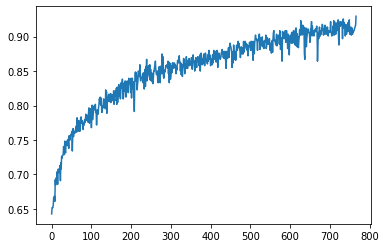

In [24]:
plt.plot(epochs, result['accuracy'])
plt.show()

In [25]:
!pip install Scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for Scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=b252b8ef20d27a29b525c8f2ebc3341732f1abf6a841db655f27f7ee8f923b79
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built Scikit-fuzzy


In [26]:
glucose=ctrl.Antecedent(np.arange(0,200,1), 'glucose')
bp=ctrl.Antecedent(np.arange(0,122,1), 'bp')
age=ctrl.Antecedent(np.arange(0,101,1), 'age')
dindex=ctrl.Antecedent(np.arange(0,101,1), 'dindex')
insulin=ctrl.Antecedent(np.arange(0,901,1),'insulin')
bmi=ctrl.Antecedent(np.arange(0,65.0,0.1),'bmi')

chances=ctrl.Consequent(np.arange(0,101, 1), 'chances')

In [27]:
chances['low']=fuzz.trimf(chances.universe,[0,10,20])
chances['int']=fuzz.trimf(chances.universe, [20,30,50])
chances['high']=fuzz.trimf(chances.universe, [40, 100, 100])

In [28]:
age['low']=fuzz.trapmf(age.universe,[0,0,30,35])
age['mid']=fuzz.trapmf(age.universe,[25,35,45,50])
age['high']=fuzz.trapmf(age.universe,[40,50,55,70])

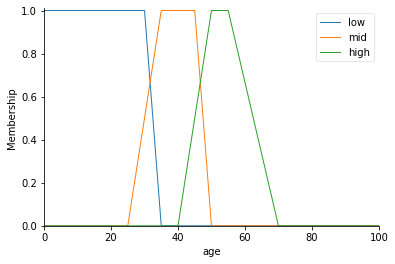

In [29]:
age.view()

In [30]:
insulin['low']=fuzz.trapmf(insulin.universe,[0,40,90,115])
insulin['mid']=fuzz.trapmf(insulin.universe,[75,110,225,300])
insulin['high']=fuzz.trapmf(insulin.universe,[200,250,450,900])

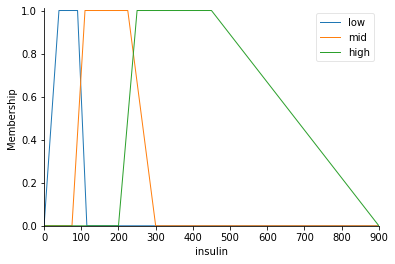

In [31]:
insulin.view()

In [32]:
bmi['low']=fuzz.trapmf(bmi.universe,[0,25.0,30.0,32.5])
bmi['mid']=fuzz.trapmf(bmi.universe,[27.5,31.0,35.0,40.0])
bmi['high']=fuzz.trapmf(bmi.universe,[37.5,41.0,49.0,68.0])

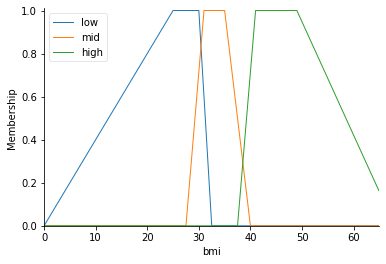

In [33]:
bmi.view()

In [34]:
dindex['no']=fuzz.trapmf(dindex.universe,[0,30,45,60])
dindex['yes']=fuzz.trapmf(dindex.universe,[45,60,75,100])

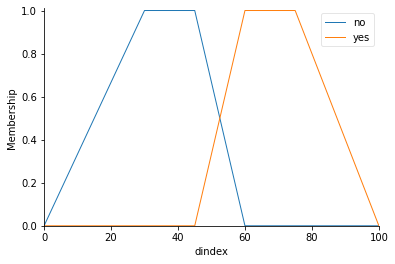

In [35]:
dindex.view()

In [36]:
bp['low']=fuzz.trapmf(bp.universe,[0,40,70,90])
bp['high']=fuzz.trapmf(bp.universe,[70,100,120,120])

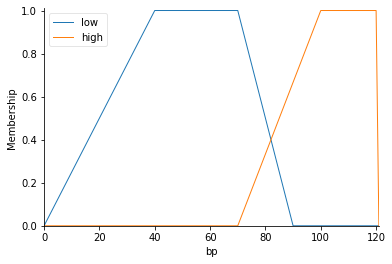

In [37]:
bp.view()

In [38]:
glucose['low']=fuzz.trapmf(glucose.universe,[0,40,80,110])
glucose['inter']=fuzz.trapmf(glucose.universe,[80,100,120,140])
glucose['high']=fuzz.trapmf(glucose.universe,[110,140,160,200])

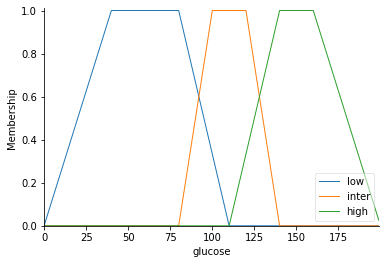

In [39]:
glucose.view()

In [41]:
rule1=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['low']|insulin['low'], chances['low'])
rule2=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['low']|insulin['mid'], chances['low'])
rule3=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['low']|insulin['high'], chances['low'])
rule4=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['mid']|insulin['low'], chances['low'])
rule5=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['mid']|insulin['mid'], chances['low'])
rule6=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['mid']|insulin['high'], chances['low'])
rule7=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['high']|insulin['low'], chances['low'])
rule8=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['high']|insulin['mid'], chances['low'])
rule9=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['low']|bmi['high']|insulin['high'], chances['int'])


rule10=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['low']|insulin['low'], chances['low'])
rule11=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['low']|insulin['mid'], chances['low'])
rule12=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['low']|insulin['high'], chances['int'])
rule13=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['mid']|insulin['low'], chances['low'])
rule14=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['mid']|insulin['mid'], chances['int'])
rule15=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['mid']|insulin['high'], chances['low'])
rule16=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['high']|insulin['low'], chances['low'])
rule17=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['high']|insulin['mid'], chances['low'])
rule18=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['mid']|bmi['high']|insulin['high'], chances['int'])

rule19=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['low']|insulin['low'], chances['low'])
rule20=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['low']|insulin['mid'], chances['int'])
rule21=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['low']|insulin['high'], chances['high'])
rule22=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['mid']|insulin['low'], chances['int'])
rule23=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['mid']|insulin['mid'], chances['int'])
rule24=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['mid']|insulin['high'], chances['high'])
rule25=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['high']|insulin['low'], chances['int'])
rule26=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['high']|insulin['mid'], chances['high'])
rule27=ctrl.Rule(glucose['low']| bp['low']| dindex['no']|age['high']|bmi['high']|insulin['high'], chances['high'])



rule28=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['low']|insulin['low'], chances['int'])
rule29=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['low']|insulin['mid'], chances['int'])
rule30=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['low']|insulin['high'], chances['int'])
rule31=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['mid']|insulin['low'], chances['int'])
rule32=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['mid']|insulin['mid'], chances['int'])
rule33=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['mid']|insulin['high'], chances['int'])
rule34=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['high']|insulin['low'], chances['int'])
rule35=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['high']|insulin['mid'], chances['int'])
rule36=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['low']|bmi['high']|insulin['high'], chances['high'])
rule37=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['low']|insulin['low'], chances['int'])
rule38=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['low']|insulin['mid'], chances['int'])
rule39=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['low']|insulin['high'], chances['high'])
rule40=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['mid']|insulin['low'], chances['int'])
rule41=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['mid']|insulin['mid'], chances['high'])
rule42=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['mid']|insulin['high'], chances['int'])
rule43=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['high']|insulin['low'], chances['int'])
rule44=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['high']|insulin['mid'], chances['int'])
rule45=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['mid']|bmi['high']|insulin['high'], chances['high'])
rule46=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['low']|insulin['low'], chances['int'])
rule47=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['low']|insulin['mid'], chances['high'])
rule48=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['low']|insulin['high'], chances['high'])
rule49=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['mid']|insulin['low'], chances['high'])
rule50=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['mid']|insulin['mid'], chances['high'])
rule51=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['mid']|insulin['high'], chances['high'])
rule52=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['high']|insulin['low'], chances['high'])
rule53=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['high']|insulin['mid'], chances['high'])
rule54=ctrl.Rule(glucose['low']| bp['low']| dindex['yes']|age['high']|bmi['high']|insulin['high'], chances['high'])





rule55=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['low'], chances['int'])
rule56=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['mid'], chances['int'])
rule57=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['high'], chances['int'])
rule58=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['low'], chances['int'])
rule59=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['mid'], chances['int'])
rule60=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['high'], chances['int'])
rule61=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['low'], chances['int'])
rule62=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['mid'], chances['int'])
rule63=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['high'], chances['high'])
rule64=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['low'], chances['int'])
rule65=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['mid'], chances['int'])
rule66=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['high'], chances['high'])
rule67=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['low'], chances['int'])
rule68=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['mid'], chances['high'])
rule69=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['high'], chances['int'])
rule70=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['low'], chances['int'])
rule71=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['mid'], chances['int'])
rule72=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['high'], chances['high'])
rule73=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['low'], chances['int'])
rule74=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['mid'], chances['high'])
rule75=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['high'], chances['high'])
rule76=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['low'], chances['high'])
rule77=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['mid'], chances['high'])
rule78=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['high'], chances['high'])
rule79=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['low'], chances['high'])
rule80=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['mid'], chances['high'])
rule81=ctrl.Rule(glucose['low']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['high'], chances['high'])




rule82=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['low'], chances['int'])
rule83=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['mid'], chances['int'])
rule84=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['high'], chances['int'])
rule85=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['low'], chances['int'])
rule86=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['mid'], chances['int'])
rule87=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['high'], chances['int'])
rule88=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['low'], chances['int'])
rule89=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['mid'], chances['int'])
rule90=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['high'], chances['high'])
rule91=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['low'], chances['int'])
rule92=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['mid'], chances['int'])
rule93=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['high'], chances['high'])
rule94=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['low'], chances['int'])
rule95=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['mid'], chances['high'])
rule96=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['high'], chances['int'])
rule97=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['low'], chances['int'])
rule98=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['mid'], chances['int'])
rule99=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['high'], chances['high'])
rule100=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['low'], chances['int'])
rule101=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['mid'], chances['high'])
rule102=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['high'], chances['high'])
rule103=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['low'], chances['high'])
rule104=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['mid'], chances['high'])
rule105=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['high'], chances['high'])
rule106=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['low'], chances['high'])
rule107=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['mid'], chances['high'])
rule108=ctrl.Rule(glucose['inter']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['high'], chances['high'])



rule109=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['low'], chances['int'])
rule110=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['mid'], chances['int'])
rule111=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['low']|insulin['high'], chances['int'])
rule112=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['low'], chances['int'])
rule113=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['mid'], chances['int'])
rule114=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['mid']|insulin['high'], chances['int'])
rule115=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['low'], chances['int'])
rule116=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['mid'], chances['int'])
rule117=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['low']|bmi['high']|insulin['high'], chances['high'])
rule118=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['low'], chances['int'])
rule119=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['mid'], chances['int'])
rule120=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['low']|insulin['high'], chances['high'])
rule121=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['low'], chances['int'])
rule122=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['mid'], chances['high'])
rule123=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['mid']|insulin['high'], chances['int'])
rule124=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['low'], chances['int'])
rule125=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['mid'], chances['int'])
rule126=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['mid']|bmi['high']|insulin['high'], chances['high'])
rule127=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['low'], chances['int'])
rule128=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['mid'], chances['high'])
rule129=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['low']|insulin['high'], chances['high'])
rule130=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['low'], chances['high'])
rule131=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['mid'], chances['high'])
rule132=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['mid']|insulin['high'], chances['high'])
rule133=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['low'], chances['high'])
rule134=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['mid'], chances['high'])
rule135=ctrl.Rule(glucose['high']| bp['high']| dindex['yes']|age['high']|bmi['high']|insulin['high'], chances['high'])


In [42]:
chances_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5, rule6, rule7, rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule40,rule41,rule42,rule43,rule44,rule45,rule46,rule47,rule48,rule49,rule50,rule51,rule52,rule53,rule54,rule55,rule56,rule57,rule58,rule59,rule60,rule61,rule62,rule63,rule64,rule65,rule66,rule67,rule68,rule69,rule70,rule71,rule72,rule73,rule74,rule75,rule76,rule77,rule78,rule79,rule80,rule81,rule82,rule83,rule84,rule85,rule86,rule87,rule88,rule89,rule90,rule91,rule92,rule93,rule94,rule95,rule96,rule97,rule98,rule99,rule100,rule101,rule102,rule103,rule104,rule105,rule106,rule107,rule108,rule109,rule110,rule111,rule112,rule113,rule114,rule115,rule116,rule117,rule118,rule119,rule120,rule121,rule122,rule123,rule124,rule125,rule126,rule127,rule128,rule129,rule130,rule131,rule132,rule133,rule134,rule135])

In [43]:
result=ctrl.ControlSystemSimulation(chances_ctrl)

In [44]:
result.input['glucose']=99
result.input['bp']=84
result.input['age']=50
result.input['dindex']=388

result.input['insulin']=0

result.input['bmi']=554

In [45]:
result.compute()

In [46]:
result.compute()

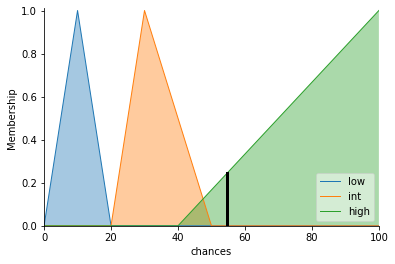

In [47]:
chances.view(sim=result)